In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

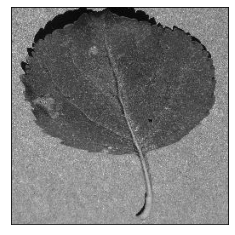

In [3]:
img = cv2.imread('/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___Black_rot/00e909aa-e3ae-4558-9961-336bb0f35db3___JR_FrgE.S 8593.JPG', 0)
plt.imshow(img, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

Text(0, 0.5, 'Frequency')

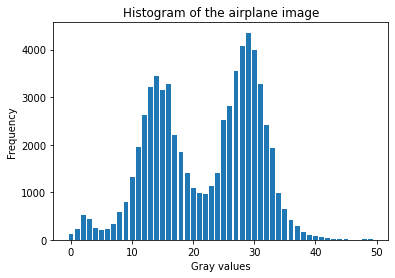

In [4]:
hist = cv2.calcHist([img],[0],None,[50],[0,256])

# different methods for displaying a histogram
plt.bar(range(50), hist.ravel())
plt.title('Histogram of the airplane image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')

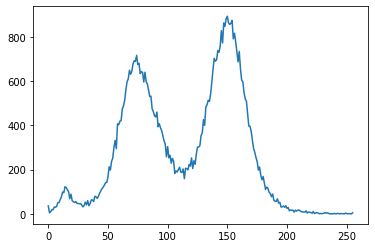

In [5]:
# Another method
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.plot(hist)

In [6]:
# Let's read two other images
high = cv2.imread('/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___Black_rot/09baab32-8360-4251-9c84-a5ce6bfdfff1___JR_FrgE.S 2883.JPG')
low = cv2.imread('/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Corn_(maize)___Northern_Leaf_Blight/06c4ba4a-6a5a-460f-910e-2d42562a1a93___RS_NLB 3891.JPG')

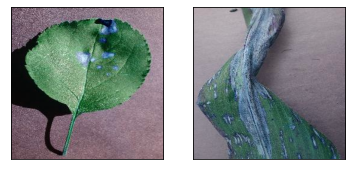

In [7]:
# show images
plt.subplot(121), plt.imshow(high)
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(low)
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.show()

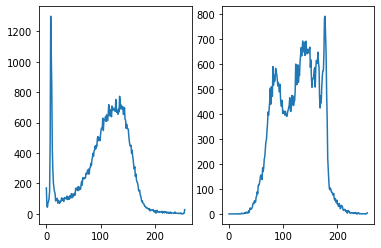

In [8]:
# Calculate histogram of both images for the last channel.
# Channels can differ from 0 to 2.
hist_high = cv2.calcHist([high],[2],None,[256],[0,256])
hist_low = cv2.calcHist([low],[2],None,[256],[0,256])

# Plot histograms
plt.subplot(121)
plt.plot(hist_high)

plt.subplot(122)
plt.plot(hist_low)

plt.show()

In [9]:
low_gray = cv2.cvtColor(low, cv2.COLOR_BGR2GRAY)
high_gray = cv2.cvtColor(high, cv2.COLOR_BGR2GRAY)

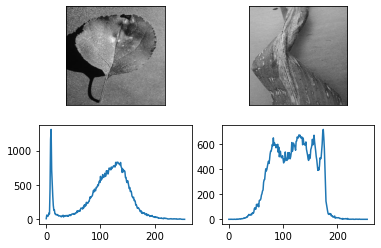

In [10]:
# show images and their histograms
plt.subplot(221), plt.imshow(high_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.plot(cv2.calcHist([high_gray],[0],None,[256],[0,256]))

plt.subplot(222), plt.imshow(low_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256]))

plt.show()

In [11]:
# Define a function to easily handle manipulation.
def manip_image(image, alpha, beta):
  
  new_image = np.zeros(image.shape, image.dtype)
  
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        new_image[y,x] = np.clip(alpha*image[y,x] + beta, 0, 255)
  
  return new_image

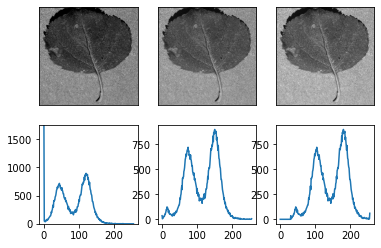

In [12]:
# Test on the image
bright = manip_image(img, 1, 30)
dark = manip_image(img, 1, -30)

# Compare the results
plt.figure()
plt.subplot(231), plt.imshow(dark, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])


plt.subplot(233),plt.imshow(bright, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
 
plt.subplot(234)
plt.plot(cv2.calcHist([dark],[0],None,[256],[0,256])), plt.ylim((0, 1750))

plt.subplot(235)
plt.plot(cv2.calcHist([img],[0],None,[256],[0,256]))

plt.subplot(236)
plt.plot(cv2.calcHist([bright],[0],None,[256],[0,256]))

(0.0, 1750.0)

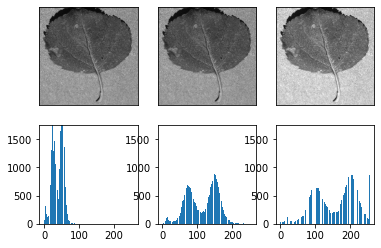

In [13]:
# Test on the image
increase_contrast = manip_image(img, 1.35, 0)
decrease_contrast = manip_image(img, 0.35, 0)

# Compare the results
plt.figure()
plt.subplot(231), plt.imshow(decrease_contrast, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])


plt.subplot(233),plt.imshow(increase_contrast, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(234)
plt.bar(range(256), 
        cv2.calcHist([decrease_contrast],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

plt.subplot(235)
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

plt.subplot(236)
plt.bar(range(256),
        cv2.calcHist([increase_contrast],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

<BarContainer object of 256 artists>

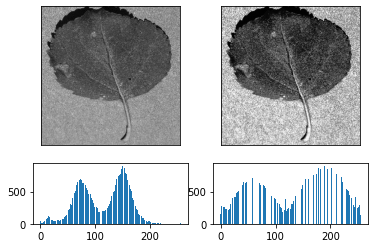

In [14]:
img_eq = cv2.equalizeHist(img)

grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.3)

plt.subplot(grid[:2, :2])
plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[:2, 2:])
plt.imshow(img_eq, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[2, :2])
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())

plt.subplot(grid[2, 2:])
plt.bar(range(256),
        cv2.calcHist([img_eq],[0],None,[256],[0,256]).ravel())

In [17]:
d = cv2.imread('/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Peach___Bacterial_spot/02b8939d-ad9b-43e7-a6f3-8005ed5877a8___Rutg._Bact.S 1921.JPG')
mask = cv2.imread('/content/drive/MyDrive/IBM/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Peach___Bacterial_spot/005b14ab-17f0-40c3-af15-87abf7d4ac23___Rutg._Bact.S 2083.JPG')

print(np.amin(d), np.amax(d))
print(np.amin(mask), np.amax(mask))

0 213
0 231


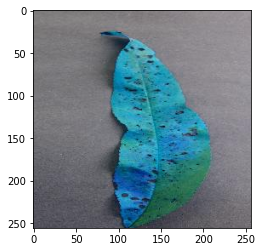

(<Figure size 432x288 with 1 Axes>,
 None)

In [18]:
plt.figure(), plt.imshow(mask), plt.show()

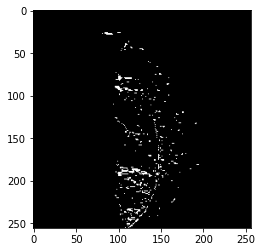

(<Figure size 432x288 with 1 Axes>,
 None)

In [19]:
mask = mask[:, :, 0]
maskInv = np.zeros_like(mask)
maskInv[mask == 0] = 255
maskInv[mask == 255] = 0
plt.figure(), plt.imshow(maskInv, cmap='gray'), plt.show()